In [12]:
import numpy as np
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '1'
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [13]:
actions = [
    'come',
    'away',
    'spin'
]

data = np.concatenate([
    np.load('dataset/seq_come_1627646273.npy'),
    np.load('dataset/seq_away_1627646273.npy'),
    np.load('dataset/seq_spin_1627646273.npy')
], axis=0)

data.shape

(1272, 30, 100)

In [14]:
x_data = data[:, :, :-1]
labels = data[:, 0, -1]

print(x_data.shape)
print(labels.shape)

(1272, 30, 99)
(1272,)


In [15]:
from tensorflow.keras.utils import to_categorical

y_data = to_categorical(labels, num_classes=len(actions))
y_data.shape

(1272, 3)

In [16]:
from sklearn.model_selection import train_test_split

x_data = x_data.astype(np.float32)
y_data = y_data.astype(np.float32)

x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.1, random_state=2021)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(1144, 30, 99) (1144, 3)
(128, 30, 99) (128, 3)


In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(64, activation='relu', input_shape=x_train.shape[1:3]),
    Dense(32, activation='relu'),
    Dense(len(actions), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 64)                41984     
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 3)                 99        
                                                                 
Total params: 44,163
Trainable params: 44,163
Non-trainable params: 0
_________________________________________________________________


In [18]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

history = model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    epochs=200,
    callbacks=[
        ModelCheckpoint('models/model.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto'),
        ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=50, verbose=1, mode='auto')
    ]
)

Epoch 1/200
36/36 [==============================] - ETA: 0s - loss: 56.2036 - acc: 0.5795
Epoch 1: val_acc improved from -inf to 0.66406, saving model to models\model.h5
36/36 [==============================] - 6s 51ms/step - loss: 56.2036 - acc: 0.5795 - val_loss: 34.5153 - val_acc: 0.6641 - lr: 0.0010
Epoch 2/200
35/36 [============================>.] - ETA: 0s - loss: 42.9237 - acc: 0.6723
Epoch 2: val_acc did not improve from 0.66406
36/36 [==============================] - 1s 23ms/step - loss: 42.9803 - acc: 0.6705 - val_loss: 41.0946 - val_acc: 0.5078 - lr: 0.0010
Epoch 3/200
34/36 [===========================>..] - ETA: 0s - loss: 17.0455 - acc: 0.6765
Epoch 3: val_acc improved from 0.66406 to 0.85938, saving model to models\model.h5
36/36 [==============================] - 1s 23ms/step - loss: 16.4496 - acc: 0.6853 - val_loss: 5.2367 - val_acc: 0.8594 - lr: 0.0010
Epoch 4/200
34/36 [===========================>..] - ETA: 0s - loss: 2.3937 - acc: 0.8814
Epoch 4: val_acc improve

Epoch 31/200
33/36 [==========================>...] - ETA: 0s - loss: 0.4933 - acc: 0.9621
Epoch 31: val_acc did not improve from 0.99219
36/36 [==============================] - 1s 18ms/step - loss: 0.4899 - acc: 0.9633 - val_loss: 0.5738 - val_acc: 0.9766 - lr: 0.0010
Epoch 32/200
35/36 [============================>.] - ETA: 0s - loss: 0.3090 - acc: 0.9768
Epoch 32: val_acc did not improve from 0.99219
36/36 [==============================] - 1s 18ms/step - loss: 0.3025 - acc: 0.9773 - val_loss: 0.5203 - val_acc: 0.9688 - lr: 0.0010
Epoch 33/200
34/36 [===========================>..] - ETA: 0s - loss: 0.7140 - acc: 0.9522
Epoch 33: val_acc did not improve from 0.99219
36/36 [==============================] - 1s 18ms/step - loss: 0.6923 - acc: 0.9510 - val_loss: 2.6890 - val_acc: 0.8750 - lr: 0.0010
Epoch 34/200
33/36 [==========================>...] - ETA: 0s - loss: 1.2601 - acc: 0.9479
Epoch 34: val_acc did not improve from 0.99219
36/36 [==============================] - 1s 18ms/

34/36 [===========================>..] - ETA: 0s - loss: 0.3383 - acc: 0.9715
Epoch 61: val_acc did not improve from 0.99219
36/36 [==============================] - 1s 18ms/step - loss: 0.3218 - acc: 0.9729 - val_loss: 0.1468 - val_acc: 0.9844 - lr: 0.0010
Epoch 62/200
36/36 [==============================] - ETA: 0s - loss: 0.0754 - acc: 0.9939
Epoch 62: val_acc did not improve from 0.99219
36/36 [==============================] - 1s 21ms/step - loss: 0.0754 - acc: 0.9939 - val_loss: 0.2023 - val_acc: 0.9766 - lr: 0.0010
Epoch 63/200
36/36 [==============================] - ETA: 0s - loss: 0.1489 - acc: 0.9878
Epoch 63: val_acc did not improve from 0.99219
36/36 [==============================] - 1s 25ms/step - loss: 0.1489 - acc: 0.9878 - val_loss: 0.4352 - val_acc: 0.9844 - lr: 0.0010
Epoch 64/200
34/36 [===========================>..] - ETA: 0s - loss: 0.1538 - acc: 0.9844
Epoch 64: val_acc did not improve from 0.99219
36/36 [==============================] - 1s 21ms/step - loss: 

Epoch 91/200
35/36 [============================>.] - ETA: 0s - loss: 1.6190 - acc: 0.9152
Epoch 91: val_acc did not improve from 0.99219
36/36 [==============================] - 1s 34ms/step - loss: 1.5850 - acc: 0.9170 - val_loss: 1.6682 - val_acc: 0.9375 - lr: 5.0000e-04
Epoch 92/200
34/36 [===========================>..] - ETA: 0s - loss: 2.7547 - acc: 0.8888
Epoch 92: val_acc did not improve from 0.99219
36/36 [==============================] - 1s 30ms/step - loss: 2.7768 - acc: 0.8881 - val_loss: 2.7823 - val_acc: 0.8984 - lr: 5.0000e-04
Epoch 93/200
36/36 [==============================] - ETA: 0s - loss: 5.9774 - acc: 0.7727
Epoch 93: val_acc did not improve from 0.99219
36/36 [==============================] - 1s 29ms/step - loss: 5.9774 - acc: 0.7727 - val_loss: 1.9416 - val_acc: 0.8906 - lr: 5.0000e-04
Epoch 94/200
36/36 [==============================] - ETA: 0s - loss: 15.3390 - acc: 0.7404
Epoch 94: val_acc did not improve from 0.99219
36/36 [=============================

36/36 [==============================] - 1s 35ms/step - loss: 0.3188 - acc: 0.9869 - val_loss: 4.5430e-04 - val_acc: 1.0000 - lr: 5.0000e-04
Epoch 121/200
35/36 [============================>.] - ETA: 0s - loss: 0.3351 - acc: 0.9830
Epoch 121: val_acc did not improve from 1.00000
36/36 [==============================] - 1s 30ms/step - loss: 0.3282 - acc: 0.9834 - val_loss: 5.3824e-06 - val_acc: 1.0000 - lr: 5.0000e-04
Epoch 122/200
35/36 [============================>.] - ETA: 0s - loss: 0.5364 - acc: 0.9750
Epoch 122: val_acc did not improve from 1.00000
36/36 [==============================] - 1s 31ms/step - loss: 0.5279 - acc: 0.9747 - val_loss: 0.0346 - val_acc: 0.9922 - lr: 5.0000e-04
Epoch 123/200
36/36 [==============================] - ETA: 0s - loss: 0.3324 - acc: 0.9790
Epoch 123: val_acc did not improve from 1.00000
36/36 [==============================] - 1s 32ms/step - loss: 0.3324 - acc: 0.9790 - val_loss: 3.8751e-05 - val_acc: 1.0000 - lr: 5.0000e-04
Epoch 124/200
34/36 

Epoch 150/200
35/36 [============================>.] - ETA: 0s - loss: 0.2797 - acc: 0.9839
Epoch 150: val_acc did not improve from 1.00000
36/36 [==============================] - 1s 19ms/step - loss: 0.2738 - acc: 0.9843 - val_loss: 0.1854 - val_acc: 0.9844 - lr: 5.0000e-04
Epoch 151/200
34/36 [===========================>..] - ETA: 0s - loss: 0.3208 - acc: 0.9807
Epoch 151: val_acc did not improve from 1.00000
36/36 [==============================] - 1s 18ms/step - loss: 0.3052 - acc: 0.9816 - val_loss: 0.1663 - val_acc: 0.9844 - lr: 5.0000e-04
Epoch 152/200
33/36 [==========================>...] - ETA: 0s - loss: 0.3419 - acc: 0.9782
Epoch 152: val_acc did not improve from 1.00000
36/36 [==============================] - 1s 18ms/step - loss: 0.3158 - acc: 0.9799 - val_loss: 0.0064 - val_acc: 0.9922 - lr: 5.0000e-04
Epoch 153/200
35/36 [============================>.] - ETA: 0s - loss: 0.1768 - acc: 0.9812
Epoch 153: val_acc did not improve from 1.00000
36/36 [======================

35/36 [============================>.] - ETA: 0s - loss: 0.1455 - acc: 0.9875
Epoch 179: val_acc did not improve from 1.00000
36/36 [==============================] - 1s 27ms/step - loss: 0.1843 - acc: 0.9869 - val_loss: 0.0372 - val_acc: 0.9922 - lr: 2.5000e-04
Epoch 180/200
34/36 [===========================>..] - ETA: 0s - loss: 0.1307 - acc: 0.9926
Epoch 180: val_acc did not improve from 1.00000
36/36 [==============================] - 1s 24ms/step - loss: 0.1283 - acc: 0.9921 - val_loss: 0.1058 - val_acc: 0.9844 - lr: 2.5000e-04
Epoch 181/200
36/36 [==============================] - ETA: 0s - loss: 0.2084 - acc: 0.9816
Epoch 181: val_acc did not improve from 1.00000
36/36 [==============================] - 1s 23ms/step - loss: 0.2084 - acc: 0.9816 - val_loss: 0.0254 - val_acc: 0.9922 - lr: 2.5000e-04
Epoch 182/200
35/36 [============================>.] - ETA: 0s - loss: 0.1021 - acc: 0.9911
Epoch 182: val_acc did not improve from 1.00000
36/36 [==============================] - 1s

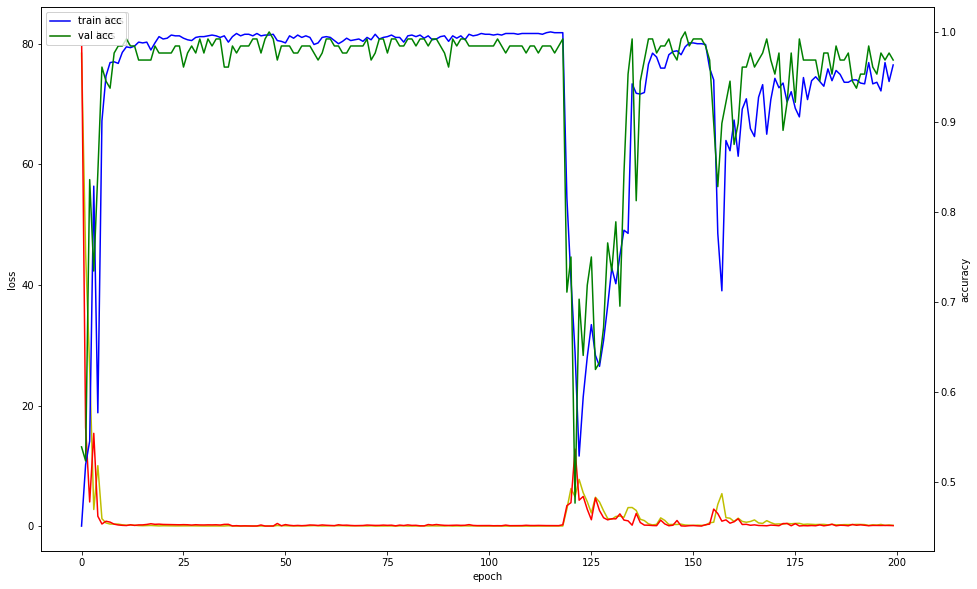

In [10]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(16, 10))
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [19]:
from sklearn.metrics import multilabel_confusion_matrix
from tensorflow.keras.models import load_model

model = load_model('models/model.h5')

y_pred = model.predict(x_val)

multilabel_confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))

4/4 [==============================] - 2s 12ms/step


array([[[94,  0],
        [ 0, 34]],

       [[81,  0],
        [ 0, 47]],

       [[81,  0],
        [ 0, 47]]], dtype=int64)